In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
delhi_data = pd.read_csv('Delhi_data.csv')
mum_data = pd.read_csv('mumbai_data.csv')
ahm_data = pd.read_csv('ahm_data.csv')
chn_data = pd.read_csv('chennai_data.csv')
gur_data = pd.read_csv('gurgaon_data.csv')
kol_data = pd.read_csv('kolkata_data.csv')
pune_data = pd.read_csv('pune_data.csv')
hyd_data = pd.read_csv('hyd_data.csv')

In [3]:
delhi_data.head(2)

,price,Furnishing,Bathroom,Balcony,locality,bhk,city
0,170000,Semi-Furnished,5,3,"Maharani Bagh, New Friends Colony,",4 BHK Flat,New Delhi
1,180000,Unfurnished,4,2,"Greater Kailash 1,",4 BHK Flat,New Delhi


In [4]:
delhi_data.rename(columns={'city':'City'},inplace=True)

In [5]:
mum_data.head(2)

,Unnamed: 0,price,Furnishing,Bathroom,Balcony,bhk,locality,City
0,0,350000,Semi-Furnished,3.0,3,3 BHK Flat,"Lodha World One, Worli,",Mumbai
1,1,"41,000",Semi-Furnished,2.0,0,1 BHK Flat,"Piramal Revanta, Mulund West,",Mumbai


In [6]:
def change_type(df, column_name):
    # Dropping unncessary column
    df.drop('Unnamed: 0',inplace=True,axis=1)
    
    # Remove commas from the specified column
    df[column_name] = df[column_name].str.replace(',', '')

    # Convert the values in the specified column to integers
    df[column_name] = df[column_name].astype('int')

    return df

In [7]:
mum_data = change_type(mum_data,'price')

In [8]:
drop_index = ahm_data[ahm_data['price']=='Call for Price'].index

In [9]:
ahm_data.drop(drop_index,axis=0,inplace=True)

In [10]:
ahm_data = change_type(ahm_data,'price')

In [11]:
chn_data = change_type(chn_data,'price')

In [12]:
gur_data = change_type(gur_data,'price')

In [13]:
kol_data = change_type(kol_data,'price')

In [14]:
pune_data = change_type(pune_data,'price')

In [15]:
hyd_data = change_type(hyd_data,'price')

In [16]:
print(delhi_data.info())
print('##'*20)
print(mum_data.info())
print('##'*20)
print(ahm_data.info())
print('##'*20)
print(chn_data.info())
print('##'*20)
print(gur_data.info())  
print('##'*20)   
print(kol_data.info())
print('##'*20)   
print(pune_data.info())
print('##'*20)   
print(hyd_data.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       1492 non-null   int64 
 1   Furnishing  1492 non-null   object
 2   Bathroom    1492 non-null   object
 3   Balcony     1492 non-null   object
 4   locality    1492 non-null   object
 5   bhk         1492 non-null   object
 6   City        1492 non-null   object
dtypes: int64(1), object(6)
memory usage: 81.7+ KB
None
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1496 non-null   int32  
 1   Furnishing  1496 non-null   object 
 2   Bathroom    1496 non-null   float64
 3   Balcony     1496 non-null   object 
 4   bhk         1496 non-null   object 
 5   locality    1496 non-null   object 
 6 

In [17]:
final_df = pd.concat([delhi_data,mum_data,ahm_data,chn_data,gur_data,kol_data,pune_data,hyd_data])

In [18]:
final_df.isnull().sum()

price         0
Furnishing    0
Bathroom      0
Balcony       0
locality      0
bhk           0
City          0
dtype: int64

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11709 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       11709 non-null  int64 
 1   Furnishing  11709 non-null  object
 2   Bathroom    11709 non-null  object
 3   Balcony     11709 non-null  object
 4   locality    11709 non-null  object
 5   bhk         11709 non-null  object
 6   City        11709 non-null  object
dtypes: int64(1), object(6)
memory usage: 731.8+ KB


In [20]:
final_df['Bathroom']= final_df['Bathroom'].replace('> 10','10')

In [21]:
final_df['Bathroom'] = final_df['Bathroom'].astype('int')

In [22]:
final_df['Balcony']= final_df['Balcony'].replace('> 10','10')

In [23]:
final_df['Balcony'] = final_df['Balcony'].astype('int')

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11709 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       11709 non-null  int64 
 1   Furnishing  11709 non-null  object
 2   Bathroom    11709 non-null  int32 
 3   Balcony     11709 non-null  int32 
 4   locality    11709 non-null  object
 5   bhk         11709 non-null  object
 6   City        11709 non-null  object
dtypes: int32(2), int64(1), object(4)
memory usage: 640.3+ KB


In [25]:
final_df.describe()

,price,Bathroom,Balcony
count,1.170900e+04,11709.000000,11709.000000
mean,4.251507e+04,2.198821,1.029550
std,9.549233e+04,1.087681,1.165124
min,1.000000e+03,0.000000,0.000000
25%,1.200000e+04,1.000000,0.000000
50%,2.000000e+04,2.000000,1.000000
75%,4.000000e+04,3.000000,2.000000
max,5.000000e+06,10.000000,10.000000


In [26]:
final_df = final_df.drop_duplicates()

In [27]:
final_df.head()

,price,Furnishing,Bathroom,Balcony,locality,bhk,City
0,170000,Semi-Furnished,5,3,"Maharani Bagh, New Friends Colony,",4 BHK Flat,New Delhi
1,180000,Unfurnished,4,2,"Greater Kailash 1,",4 BHK Flat,New Delhi
2,30000,Semi-Furnished,2,3,"Gauri Ganesh Apartment, Dwarka Sector 3,",3 BHK Flat,New Delhi
3,47000,Semi-Furnished,2,1,"Poorvi Pitampura,",3 BHK Flat,New Delhi
4,48000,Unfurnished,3,4,"DLF Capital Greens 1 and 2, Moti Nagar, Kirti...",3 BHK Flat,New Delhi


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11571 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       11571 non-null  int64 
 1   Furnishing  11571 non-null  object
 2   Bathroom    11571 non-null  int32 
 3   Balcony     11571 non-null  int32 
 4   locality    11571 non-null  object
 5   bhk         11571 non-null  object
 6   City        11571 non-null  object
dtypes: int32(2), int64(1), object(4)
memory usage: 632.8+ KB


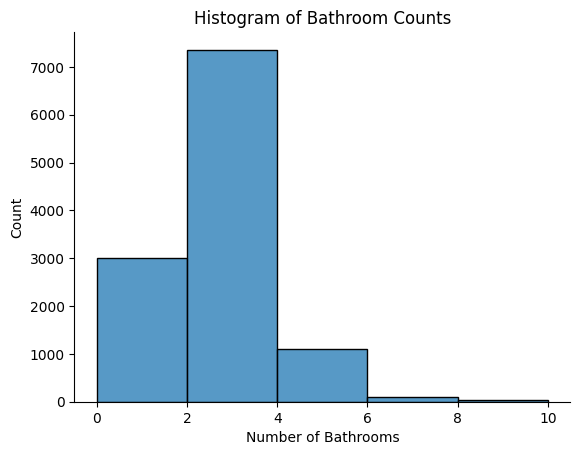

In [29]:
# Assuming 'final_df' is your DataFrame containing the 'Bathroom' column
bathroom = final_df['Bathroom'].value_counts()

# Create the histogram plot
sns.histplot(data=final_df, x='Bathroom', stat='count',binwidth=2)

# Remove grid lines
plt.grid(False)

# Remove top and right spines
sns.despine()

# Add labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Histogram of Bathroom Counts')

# Display the plot
plt.show()

In [30]:
final_df['bhk']=final_df['bhk'].str.replace('Apartment','Flat')

In [31]:
final_df['bhk'] = final_df['bhk'].str.replace('House','Flat')

In [32]:
final_df['bhk'] = final_df['bhk'].str.replace('BHK  Flat','BHK Flat')

In [33]:
final_df['bhk'] = final_df['bhk'].str.replace('BHKFlat','BHK Flat')

In [34]:
final_df['bhk'] = final_df['bhk'].str.strip()

<function matplotlib.pyplot.show(close=None, block=None)>

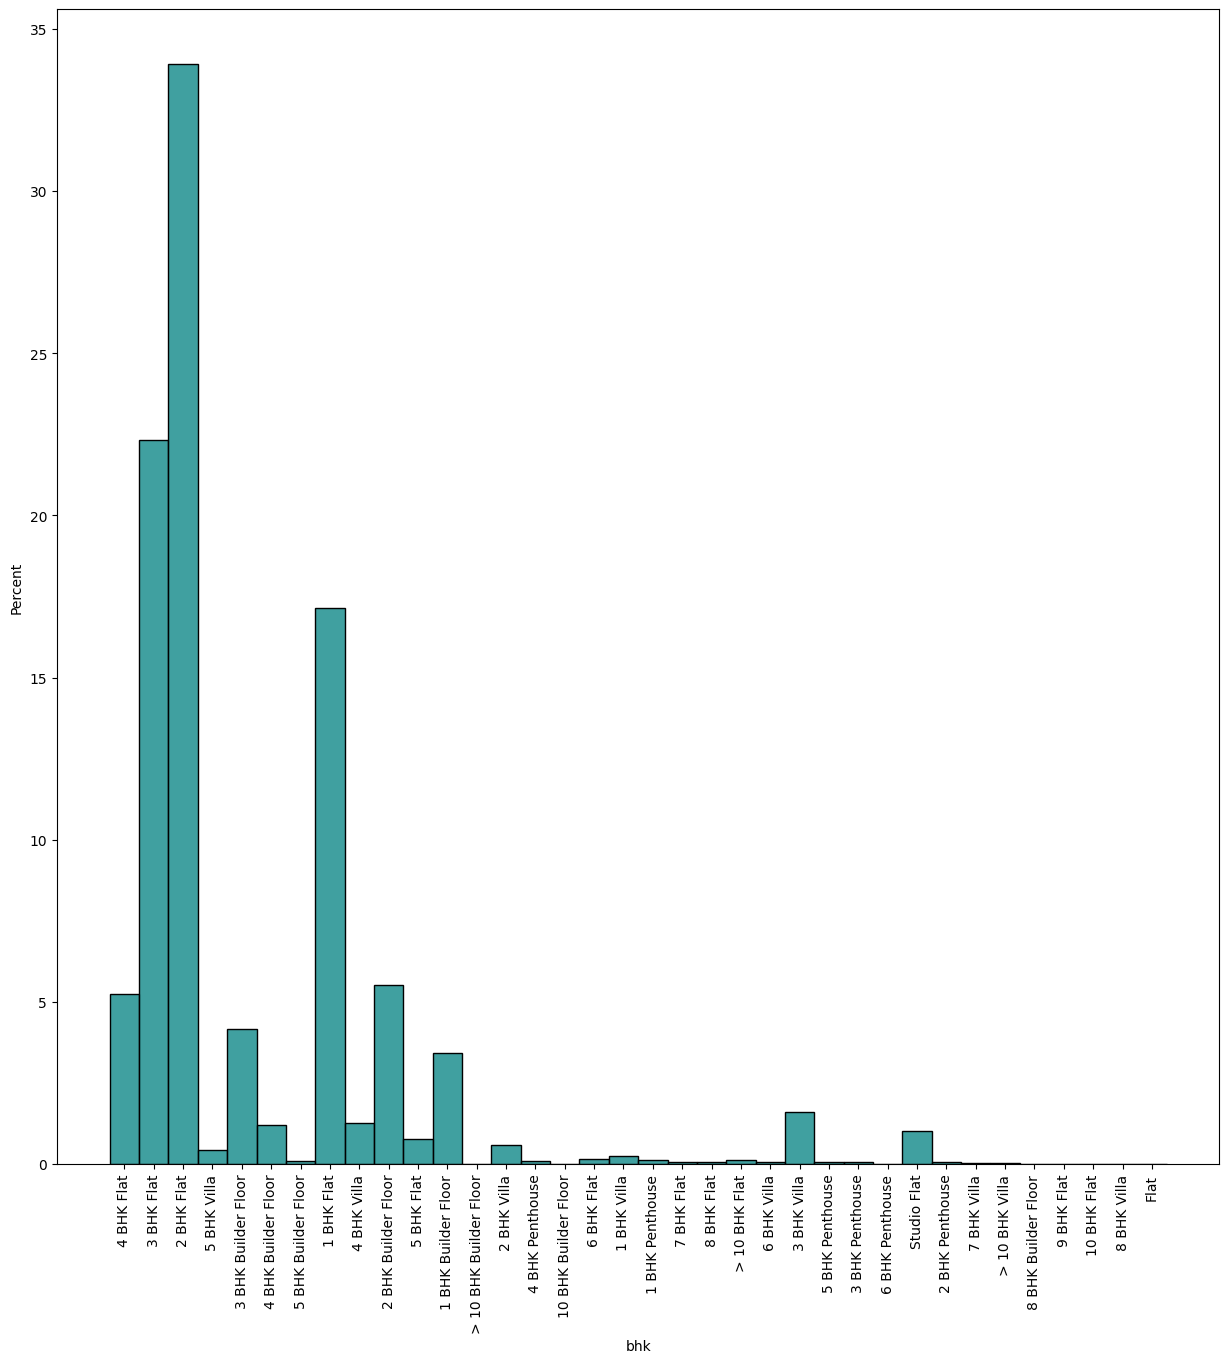

In [35]:
plt.figure(figsize=(15,15))
sns.histplot(final_df['bhk'],color='teal',stat='percent')
plt.xticks(rotation=90)
# Remove grid lines
plt.grid(False)
plt.show

In [36]:
final_df['bhk'].value_counts()

bhk
2 BHK Flat                3924
3 BHK Flat                2583
1 BHK Flat                1984
2 BHK Builder Floor        638
4 BHK Flat                 606
3 BHK Builder Floor        483
1 BHK Builder Floor        397
3 BHK Villa                186
4 BHK Villa                145
4 BHK Builder Floor        141
Studio Flat                117
5 BHK Flat                  90
2 BHK Villa                 68
5 BHK Villa                 51
1 BHK Villa                 28
6 BHK Flat                  18
> 10 BHK Flat               14
1 BHK Penthouse             13
5 BHK Builder Floor         12
4 BHK Penthouse             12
6 BHK Villa                  9
2 BHK Penthouse              9
3 BHK Penthouse              8
8 BHK Flat                   7
5 BHK Penthouse              7
7 BHK Flat                   6
7 BHK Villa                  3
> 10 BHK Villa               3
8 BHK Builder Floor          2
9 BHK Flat                   1
8 BHK Villa                  1
10 BHK Flat                  1
10 B

In [37]:
furnishing = final_df['Furnishing'].value_counts()

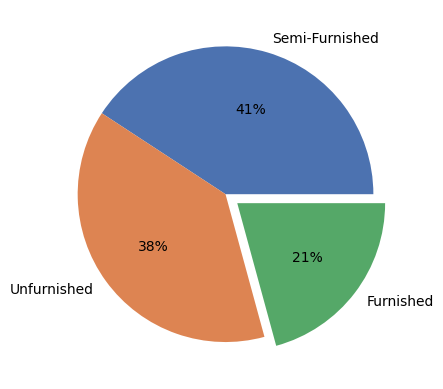

In [38]:
# declaring data
data = furnishing.values
keys = furnishing.index
  
# define Seaborn color palette to use
palette_color = sns.color_palette('deep')
  
# declaring exploding pie
explode = [0, 0, 0.1]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',explode=explode)
  
# displaying chart
plt.show()

In [39]:
final_df['locality'] = final_df['locality'].str.strip()

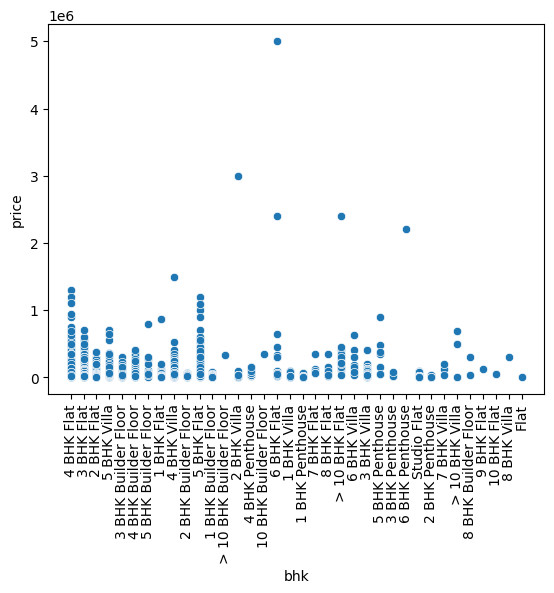

In [40]:
sns.scatterplot(x=final_df['bhk'],y=final_df['price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='price'>

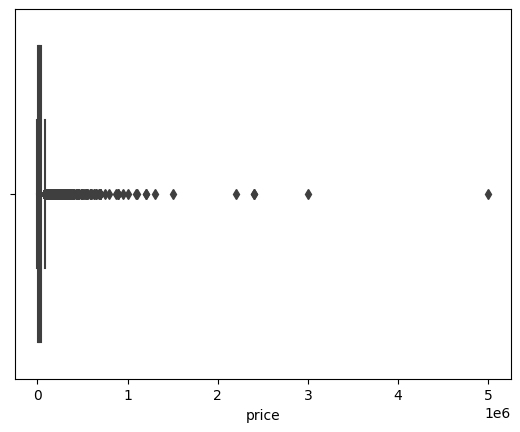

In [41]:
sns.boxplot(x= final_df['price'])

In [42]:
import numpy as np
from scipy.stats.mstats import winsorize

# Set the percentage of winsorization 
winsorization_percentage = 0.15

# Applying winsorization to the data
winsorized_data = winsorize(final_df['price'], limits=winsorization_percentage)

#print("Original data:", final_df['price'])
print("Winsorized data:", winsorized_data)

Winsorized data: [65000 65000 30000 ... 15000 10500 11000]


In [43]:
final_df['price'] = winsorized_data

<Axes: xlabel='price'>

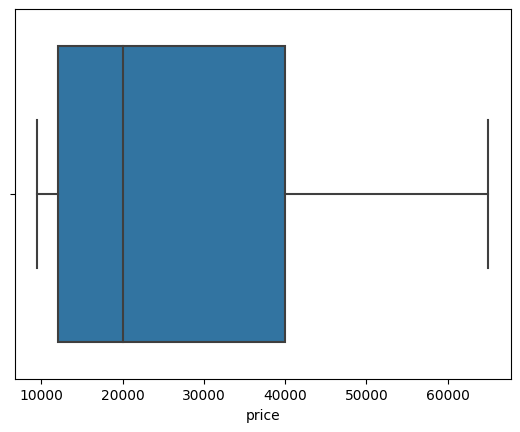

In [44]:
sns.boxplot(x= final_df['price'])

In [45]:
from sklearn.cluster import KMeans

# Extract the features relevant for clustering (you can choose any other features based on your data)
X = final_df[['price']]

# Perform K-Means clustering
num_clusters = 8  # Choose the number of clusters based on your data and requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
final_df['cluster_label'] = kmeans.fit_predict(X)

# Create a dictionary to map locality to cluster label
locality_to_cluster = dict(zip(final_df['locality'], final_df['cluster_label']))

# Replace locality names with cluster labels in the 'locality' column
final_df['locality_encoded'] = final_df['locality'].map(locality_to_cluster)


In [46]:
final_df.drop(['locality','cluster_label'],axis=1,inplace=True)

In [47]:
# labelencoder function
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    """
    Label encodes a column in a pandas dataframe.
    
    Parameters:
        df (pandas.DataFrame): the dataframe containing the column to be encoded
        column_name (str): the name of the column to be encoded
        
    Returns:
        pandas.DataFrame: the original dataframe with the encoded column
    """
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column
    return df

In [48]:
df_encoded = label_encode_column(final_df,'Furnishing')
df_encoded = label_encode_column(final_df,'bhk')
df_encoded = label_encode_column(final_df,'City')

In [49]:
df_encoded

,price,Furnishing,Bathroom,Balcony,bhk,City,locality_encoded
0,65000,1,5,3,15,6,1
1,65000,2,4,2,15,6,1
2,30000,1,2,3,11,6,2
3,47000,1,2,1,11,6,7
4,48000,2,3,4,11,6,7
...,...,...,...,...,...,...,...
1483,14000,2,2,0,7,3,0
1484,17000,1,2,2,7,3,6
1485,15000,1,3,0,11,3,0
1486,10500,1,2,0,7,3,4


<Axes: >

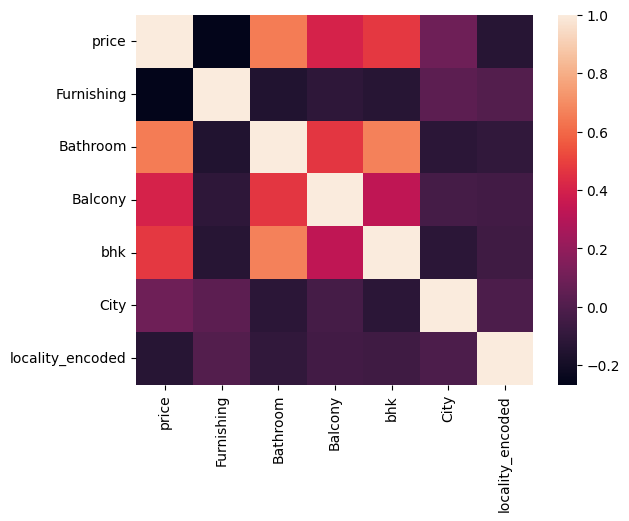

In [50]:
#Checking correaltion
sns.heatmap(df_encoded.corr())

<Axes: >

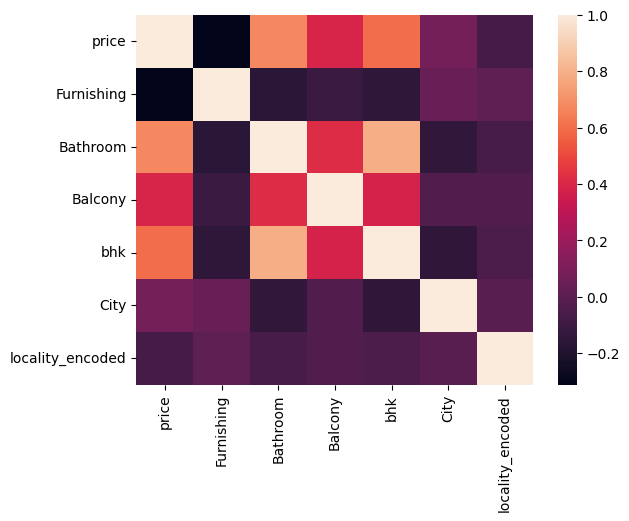

In [51]:
sns.heatmap(df_encoded.corr(method='spearman'))

In [52]:
y = df_encoded.iloc[:,0]

In [53]:
x = df_encoded.iloc[:,1:]

In [54]:
x.shape

(11571, 6)

In [55]:
y.shape

(11571,)

In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(x)

# Create a new DataFrame with normalized data
x_normalized = pd.DataFrame(normalized_data, columns=x.columns)

In [57]:
#split the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=101)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [59]:
# HyperParam Tuning - RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [60]:
# No of Trees in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num =  4)]

# No of features to consider at every split
max_features = ["auto", "sqrt", "log2"]

# Max no. of levels in tree - post-prunning
max_depth = [int(x) for x in np.linspace(10, 60, num=6)]
max_depth.append(None)

# Min no of samples required to split a node
min_samples_split = [2, 5, 10]

# Min no of sample required at each leaf node
min_samples_leaf = [1, 2 , 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [61]:
# Create the random grid hyperparameter tuning method

random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid,
                               n_iter = 10, cv=3, verbose = 1, random_state = 42, n_jobs = -1)

In [63]:
model_1 = rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [64]:
model_1.best_params_

{'n_estimators': 566,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [65]:
pred1 = model_1.predict(x_test)

In [66]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, pred1))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, pred1)*100)
print()
print("MSE:", metrics.mean_squared_error(y_test, pred1))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 4834.913468845987

MAPE: 21.83932366717056

MSE: 60850350.73148217

RMSE: 7800.663480210012


In [67]:
model_1.score(x_train,y_train)

0.8837212905841767

In [68]:
model_1.score(x_test,y_test)

0.8392530921953885

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, pred1)

0.8392530921953885